In [68]:
import sys, os
modules_path = os.path.abspath('../modules')
if modules_path not in sys.path:
    sys.path.append(modules_path)
from microstates import Microstates
from sweep import Sweep
    
import numpy as np
import matplotlib.pyplot as plt
from time import time

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [235]:
# parameters (energies in kcal/mole, ordered Pnt-Yan)
a0, b0, c0 = -9.955, -5.837, -7.043

# alpha = [.96*(a0+c0), a0] 
# beta = [.8*(b0+c0), b0] 
# gamma = [0, .7*c0] 
alpha = [-13, a0] 
beta = [-8, b0] 
gamma = [.65*c0, c0] 


params = dict(alpha=alpha, beta=beta, gamma=gamma)

In [239]:
Ns = 10
density = (25, 25)

In [240]:
#%%prun -D ../profiling/light.prof
start = time()
microstates = Microstates(Ns=Ns, params=params, ets=(0, ))
rsweep = Sweep(cmin=(0, 0), cmax=(1000, 1000), density=density)
rsweep.set_occupancies(microstates)
print(time()-start)

0.9222452640533447


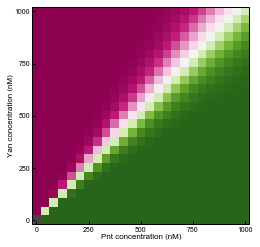

In [241]:
fig = rsweep.plot_overall_occupancy(species='Pnt', cmap=plt.cm.PiYG, mask=True)

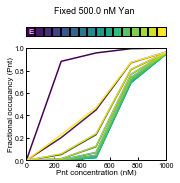

In [192]:
fig = rsweep.plot_contours(species='Pnt', variable='Pnt', fixed=0, figsize=(2.5, 2.5))